Connect Notebook to the CSV file with all the scraped data.

In [34]:
import pandas as pd
import numpy as np

# Load your CSV file

df = pd.read_csv("final_cleaned_data.csv")

# Preview
df.head()

# To check the number of rows and columns: 
#df.info()
#df.shape


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
0,RBU60880,Maurits Sabbestraat 4 202,2800.0,Apartment,Apartment,329000.0,3.0,104.0,0,0,0,1,NaN,0,2.0,0,Excellent
1,RBU61001,Nieuwstraat 13,2200.0,House,Residence,425000.0,3.0,378.0,0,0,0,1,NaN,1,2.0,0,To be renovated
2,RBU62593,Veerstraat,2840.0,Apartment,Apartment,264700.0,1.0,69.0,0,0,0,1,25.0,0,NaN,0,NaN
3,RBU60705,Winkelomseheide 158,2440.0,Apartment,Apartment,290000.0,2.0,95.0,0,0,0,1,15.0,1,2.0,0,New
4,RBU60944,Generaal van der Meerschstraat 85 2,2300.0,Apartment,Apartment,180000.0,2.0,88.0,0,0,0,1,2.0,0,2.0,0,Normal


Step 2: Data cleaning: Remove duplicates, strip blank spaces, handle empty or missing values, check and correct wrong data types and save the cleaned version

In [ ]:
# Strip blank spaces
#df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# Inspect how many missing values (NaN) there are in each column of the DataFrame.
#df.isna().sum() 

property_ID                         0
locality_name                    4002
postal_code                      1339
type                                0
subtype                             0
price (€)                         634
number_of_bedrooms                313
living_area (m²)                  785
equiped_kitchen (yes:1, no:0)       0
furnished (yes:1, no:0)             0
open_fire (yes:1, no:0)             0
terrace (yes:1, no:0)               0
terrace_area (m²)                7727
garden (yes:1, no:0)                0
number_facades                   4736
swimming_pool (yes:1, no:0)         0
state_of_building                3385
dtype: int64

In [58]:
import pandas as pd

df = pd.read_csv("final_cleaned_data.csv")

# converting float to int
df = df.apply(lambda x: x.astype("Int64") if x.dtype == float and (x.dropna() % 1 == 0).all() else x)

# converting objects to strings
df['property_ID'] = df['property_ID'].astype('string')
df['locality_name'] = df['locality_name'].astype('string')
df['type'] = df['type'].astype('string')
df['subtype'] = df['subtype'].astype('string')
df['state_of_building'] = df['state_of_building'].astype('string')

# removing properties that do not have the price
df = df.dropna(subset=["price (€)"])

# save the cleaned version
df.to_csv("cleaned_data_int.csv", index=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15366 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   property_ID                    15366 non-null  string
 1   locality_name                  11605 non-null  string
 2   postal_code                    14084 non-null  Int64 
 3   type                           15366 non-null  string
 4   subtype                        15366 non-null  string
 5   price (€)                      15366 non-null  Int64 
 6   number_of_bedrooms             15094 non-null  Int64 
 7   living_area (m²)               14601 non-null  Int64 
 8   equiped_kitchen (yes:1, no:0)  15366 non-null  int64 
 9   furnished (yes:1, no:0)        15366 non-null  int64 
 10  open_fire (yes:1, no:0)        15366 non-null  int64 
 11  terrace (yes:1, no:0)          15366 non-null  int64 
 12  terrace_area (m²)              7901 non-null   Int64 
 13  garden

STEP 3: Basic Exploratory Data Analysis (EDA):

In [62]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15366 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   property_ID                    15366 non-null  string
 1   locality_name                  11605 non-null  string
 2   postal_code                    14084 non-null  Int64 
 3   type                           15366 non-null  string
 4   subtype                        15366 non-null  string
 5   price (€)                      15366 non-null  Int64 
 6   number_of_bedrooms             15094 non-null  Int64 
 7   living_area (m²)               14601 non-null  Int64 
 8   equiped_kitchen (yes:1, no:0)  15366 non-null  int64 
 9   furnished (yes:1, no:0)        15366 non-null  int64 
 10  open_fire (yes:1, no:0)        15366 non-null  int64 
 11  terrace (yes:1, no:0)          15366 non-null  int64 
 12  terrace_area (m²)              7901 non-null   Int64 
 13  garden

In [70]:
# Check for missing values

missing_data = df.isnull().sum()
display(missing_data)

# Put the missing values per column in percentage
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df)) * 100
})


# Round to 2 decimals
missing_summary['Percentage (%)'] = missing_summary['Percentage (%)'].round(2)

display(missing_summary)



property_ID                         0
locality_name                    3761
postal_code                      1282
type                                0
subtype                             0
price (€)                           0
number_of_bedrooms                272
living_area (m²)                  765
equiped_kitchen (yes:1, no:0)       0
furnished (yes:1, no:0)             0
open_fire (yes:1, no:0)             0
terrace (yes:1, no:0)               0
terrace_area (m²)                7465
garden (yes:1, no:0)                0
number_facades                   4513
swimming_pool (yes:1, no:0)         0
state_of_building                3225
dtype: int64

,Missing Values,Percentage (%)
property_ID,0,0.00
locality_name,3761,24.48
postal_code,1282,8.34
type,0,0.00
subtype,0,0.00
price (€),0,0.00
number_of_bedrooms,272,1.77
living_area (m²),765,4.98
"equiped_kitchen (yes:1, no:0)",0,0.00
"furnished (yes:1, no:0)",0,0.00


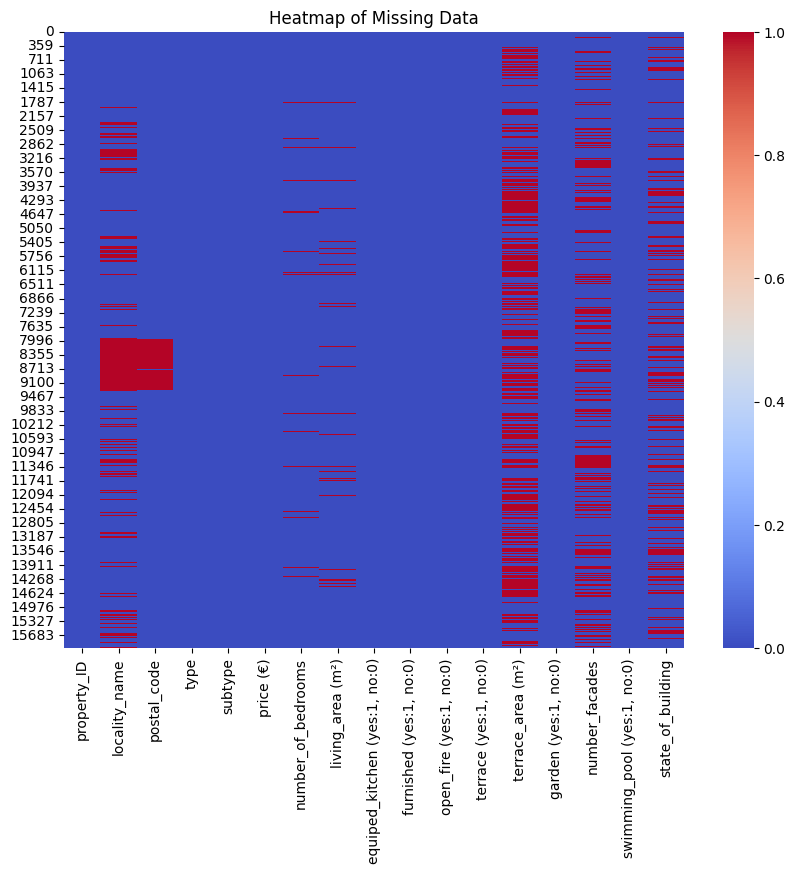

In [66]:
# Visualize missing valuas by creating a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

## Create a heatmap of missing data
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.title('Heatmap of Missing Data')
plt.show()


CORRELATION ANALYSIS
1) CORRELATION BETWEEN PRICE AND GDP PER CAPITA (PER PROVINCE)

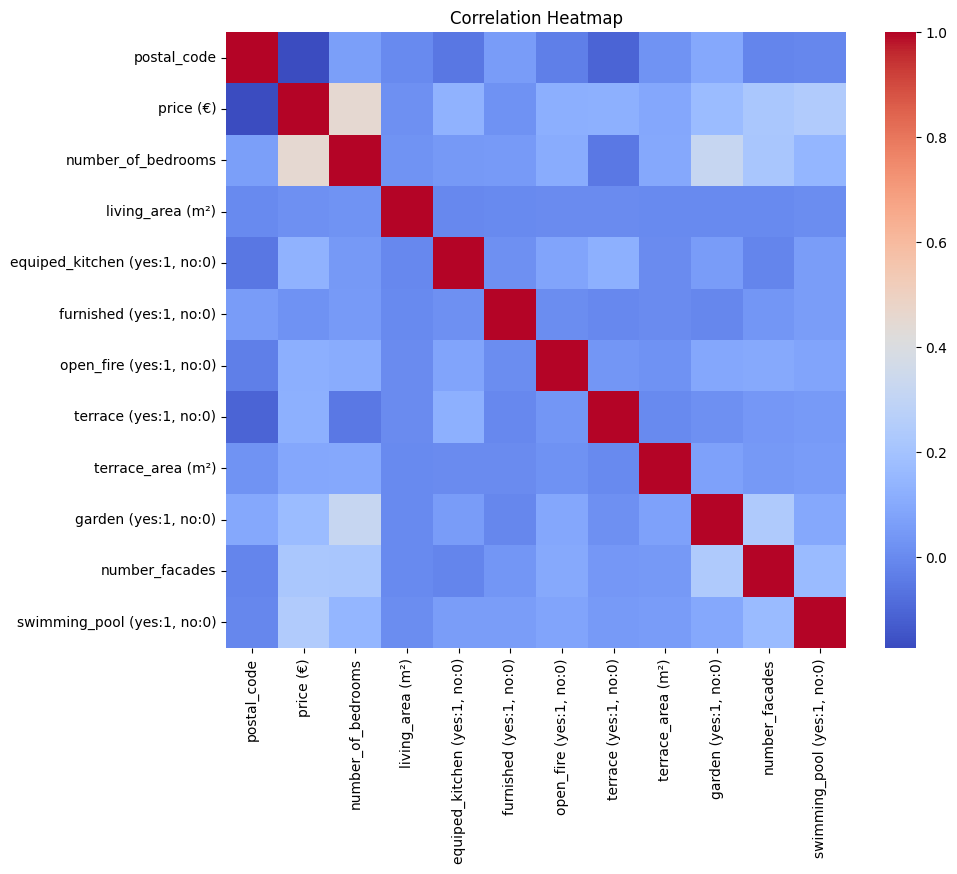

In [ ]:
# Correlation analysis:

"""Positive correlation (+1 for perfect correlation): the two variables change in the same direction.
Negative correlation (-1): the two variables change in opposite directions.
No correlation (0): there is no association or relevant relationship between the two variables."""

# Select numeric values
numeric_df = df.select_dtypes(include=np.number)

# Correlation matrix for numeric columns

corr_matrix = numeric_df.corr()
corr_matrix['price (€)'].sort_values(ascending=False)

# Visualize in a heatmap for the numeric columns (too dense)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()





CORRELATION
# Check and visualize correlation between two numerical variables at a time 
1) CORRELATION BETWEEN PRICE AND GDP PER CAPITA PER PROVINCE

In [ ]:
#Correlation between two numeric variables: property price and income per capita in €:
# Source for income per capita (gdp) per province in Belgium: Eurostat https://ec.europa.eu/eurostat/databrowser/view/tgs00003/default/table?lang=en

# dictionnary gdp per capita shown per province

gdp_per_province = {"Antwerp": 114382, 
            "East-Flanders": 74452, 
            "Limburg": 36726 , 
            "West-Flanders": 60931, 
            "Flemish-Brabant": 69558, 
            "Luik": 41196, 
            "Brabant-Wallon": 26475, 
            "Namur": 17623 ,
            "Hainaut": 42079,
            "Luxembourg": 9424,
            "Brussels": 103285}

# put the gdp_per_province dataframe in a csv file

# 1) Convert the dictionary to a DataFrame
gdp_df = pd.DataFrame(list(gdp_per_province.items()), columns=["province", "GDP"])

# 2️) Display the DataFrame to check it looks right
#print(gdp_df)

# 3️) Save it as a CSV file
gdp_df.to_csv("gdp_per_province.csv", index=False)

print("CSV file 'gdp_per_province.csv' has been created!")

display(gdp_df)



CSV file 'gdp_per_province.csv' has been created!


,province,GDP
0,Antwerp,114382
1,East-Flanders,74452
2,Limburg,36726
3,West-Flanders,60931
4,Flemish-Brabant,69558
5,Luik,41196
6,Brabant-Wallon,26475
7,Namur,17623
8,Hainaut,42079
9,Luxembourg,9424


In [111]:
"""We need to add a "province" column to our cleaned_data_int.csv file. 
Since we only have postal codes, we'll first need to map them to their provinces. 
We'll use a dictionary mapping postal codes to provinces."""

# Load data
df = pd.read_csv("cleaned_data_int.csv")

# Define postal code ranges per province
postal_to_province = {
    "Antwerp": range(2000, 3000),
    "East-Flanders": range(9000, 10000),
    "West-Flanders": range(8000, 9000),
    "Flemish-Brabant": list(range(1500, 2000)) + list(range(3000, 3500)),
    "Brussels": range(1000, 1300),
    "Limburg": range(3500, 4000),
    "Luik": range(4000, 5000),
    "Namur": range(5000, 6000),
    "Hainaut": range(6000, 6600),
    "Luxembourg": range(6600, 7000),
    "Brabant-Wallon": range(1300, 1500)
}

# Helper function to find province for each postal code
def get_province(postal_code):
    try:
        postal_code = int(postal_code)
        for province, codes in postal_to_province.items():
            if postal_code in codes:
                return province
        return "Unknown"
    except:
        return "Unknown"


# Apply the function to create a new column called "province" with the province names based on the postal codes.
df["province"] = df["postal_code"].apply(get_province)

print(df[["postal_code", "province"]].head())

# display(df.head())

# Save the updated dataset
df.to_csv("cleaned_data_with_provinces.csv", index=False)
print("New CSV saved with 'province' column!")

# Load the new dataset with province column
df = pd.read_csv("cleaned_data_with_provinces.csv")


   postal_code province
0       2800.0  Antwerp
1       2200.0  Antwerp
2       2840.0  Antwerp
3       2440.0  Antwerp
4       2300.0  Antwerp
New CSV saved with 'province' column!


In [114]:
# Calculate the average price per province
avg_price = df.groupby("province", as_index=False)["price (€)"].mean()
avg_price.rename(columns={"price (€)": "avg_price"}, inplace=True)
avg_price["avg_price"] = avg_price["avg_price"].round(0).astype(int)

display(avg_price)


# Merge with GDP dataset

gdp_df = pd.read_csv("gdp_per_province.csv")
df_merged = pd.merge(avg_price, gdp_df, on="province")

display(df_merged)


,province,avg_price
0,Antwerp,375877
1,Brabant-Wallon,458769
2,Brussels,562374
3,East-Flanders,407720
4,Flemish-Brabant,513999
5,Hainaut,232512
6,Limburg,419771
7,Luik,296252
8,Luxembourg,340825
9,Namur,308594


,province,avg_price,GDP
0,Antwerp,375877,114382
1,Brabant-Wallon,458769,26475
2,Brussels,562374,103285
3,East-Flanders,407720,74452
4,Flemish-Brabant,513999,69558
5,Hainaut,232512,42079
6,Limburg,419771,36726
7,Luik,296252,41196
8,Luxembourg,340825,9424
9,Namur,308594,17623


In [ ]:
# Check the correlation value between average price per province and gdp per province
corr_value = df_merged["avg_price"].corr(df_merged["GDP"])
print(f"Correlation between average property price per province and GDP per capita per province: {corr_value:.2f}")

Correlation between average property price per province and GDP per capita per province: 0.48


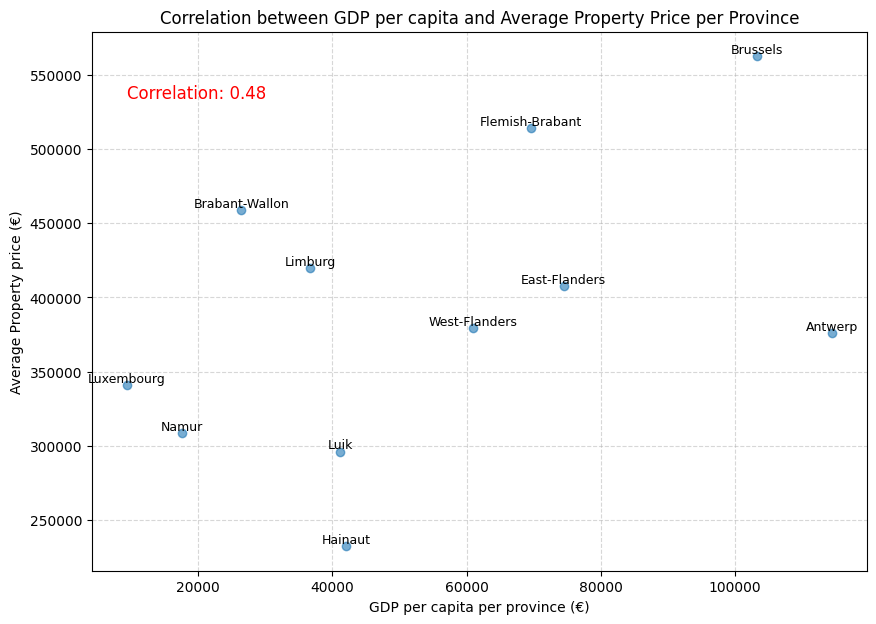

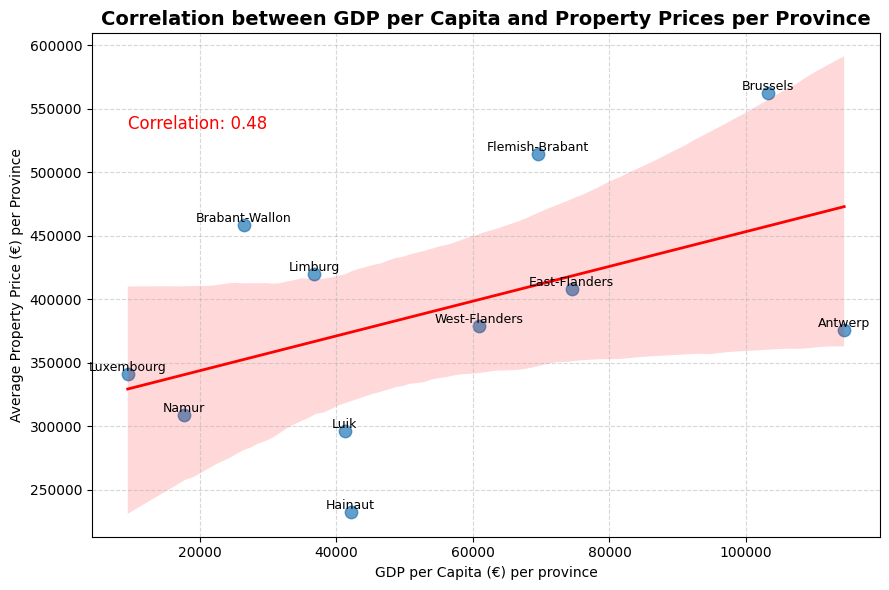

In [163]:
# Visualize the correlation between gdp per capita and price in scatter plot

import matplotlib.pyplot as plt

#Compute the correlation once
corr = df_merged["GDP"].corr(df_merged["avg_price"])


plt.figure(figsize=(10,7))
plt.scatter(df_merged["GDP"], df_merged["avg_price"], alpha=0.6, )  # alpha for transparency

# Add province names as labels
for i, row in df_merged.iterrows():
    plt.text(row["GDP"], row["avg_price"], row["province"], fontsize=9, ha='center', va='bottom')

plt.xlabel("GDP per capita per province (€)")
plt.ylabel("Average Property price (€)")
plt.title("Correlation between GDP per capita and Average Property Price per Province")
plt.grid(True,linestyle='--', alpha=0.5)

# Add correlation coefficient on the plot
plt.text(
    df_merged["GDP"].min(),
    df_merged["avg_price"].max() * 0.95,
    f"Correlation: {corr:.2f}",
    fontsize=12,
    color="red"
)
plt.show()

# Add a regression (trend) line for clarity to make the relationship clearer (and not just dots), use Seaborn’s regplot:
# the red trendline is showing the correlation, this highlights direction and strength of the correlation 

import seaborn as sns

plt.figure(figsize=(9, 6))
sns.regplot(
    data=df_merged,
    x="GDP",
    y="avg_price",
    scatter_kws={'alpha':0.7, 's':80},
    line_kws={'color':'red', 'lw':2}
)
plt.title("Correlation between GDP per Capita and Property Prices per Province", fontsize=14, weight='bold')

# Add province names as labels
for i, row in df_merged.iterrows():
    plt.text(row["GDP"], row["avg_price"], row["province"], fontsize=9, ha='center', va='bottom')

plt.xlabel("GDP per Capita (€) per province")
plt.ylabel("Average Property Price (€) per Province")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Add correlation coefficient on the plot
plt.text(
    df_merged["GDP"].min(),
    df_merged["avg_price"].max() * 0.95,
    f"Correlation: {corr:.2f}",
    fontsize=12,
    color="red"
)
plt.show()


Conclusion for correlation between gdp per capita and property prices: 
- there is a positive correlation (correlation value 0,48) between socioeconomic indicators like gdp per capita and property prices. 
- 0.48 = moderate positive correlation => It is meaningful, but not strong.
- provinces with higher GDP per capita tend to have higher property prices,
but this relationship is not very strong.
The variables move somewhat together, but many exceptions exist.
- Our result of 0.48 means that there is a real connection between wealth of a province and housing prices.
But GDP per capita alone cannot predict housing prices accurately.
- How to interpret it properly:
A correlation of 0.48 implies:
GDP per capita explains around 23% of the variation in property prices
(because correlation² = 0.48² ≈ 0.23 → “explained variance”).
So:
23% of the differences in property prices across provinces
could be associated with GDP per capita.
The other 77% is explained by other factors such as supply/demand, population density, region attractiveness, nearby cities, salary distribution, housing supply, etc.
So GDP per capita has influence — but it’s not the only important factor.


Next: What are the least/most expensive municipalities in Belgium/Wallonia/Flanders? (in terms of price per m², average price, and median price)

In [140]:
""" - Average price per province and per municipality  => draw conclusion in terms of least/most expensive
    - Median price per province and per municipality => draw conclusion in terms of least/most expensive
    - Price per m² per province and municipality => draw conclusion in terms of least/most expensive"""

# 1) Create a "price per m²” column (we need this for all ranking questions)
# Take the living area in m² to make the calculation (most common - later we can add terrace area annd garden area)

df = pd.read_csv("final_cleaned_data_extended.csv")

df['price_per_m2'] = df['price (€)'] / df['living_area (m²)']
df['price_per_m2'] = df['price_per_m2'].round(0)


df.to_csv("final_cleaned_data_extended.csv", index=False)

df[['price (€)', 'living_area (m²)', 'price_per_m2']].head()



,price (€),living_area (m²),price_per_m2
0,329000,104.0,3163.0
1,425000,378.0,1124.0
2,264700,69.0,3836.0
3,290000,95.0,3053.0
4,180000,88.0,2045.0


In [ ]:
""" 2) Calculate stats per province: Average&median price and average&median price per m²:
This answers:
Most/least expensive province by average price
Most/least expensive province by median price
Most/least expensive province by price per m²"""

province_stats = df.groupby('province').agg({
    'price (€)': ['mean', 'median'],
    'price_per_m2': ['mean', 'median']
})

province_stats = province_stats.round(0).astype("Int64")              # Round the results to integers

province_stats.sort_values(('price (€)','mean'), ascending=False)     # Most expensive avg price
province_stats.sort_values(('price (€)','mean'), ascending=True)      # Least expensive avg price

province_stats.sort_values(('price (€)','median'), ascending=False)     # Most expensive median price
province_stats.sort_values(('price (€)','median'), ascending=True)      # Least expensive median price

province_stats.sort_values(('price_per_m2','mean'), ascending=False)
province_stats.sort_values(('price_per_m2','mean'), ascending=True)

display(province_stats.sort_values(('price (€)','mean'), ascending=False))



price (€)         price_per_m2       
                     mean  median         mean median
province                                             
Brussels           570109  415000         4270   3982
Flemish-Brabant    515153  425000         5214   2946
Brabant-Wallon     451434  399000         5565   3497
Limburg            419771  317194         2957   2972
East-Flanders      404547  389000         2953   2655
West-Flanders      381219  324900         3843   2983
Antwerp            375877  339000         3045   3057
Unknown            358975  330000         2583   2584
Luxembourg         340439  290000         2604   2393
Namur              310162  295000         2606   2514
Luik               300742  284747         2767   2622
Hainaut            257322  230500         2259   1930

In [154]:
"""3) Calculate stats per municipality: same approach as for the stats per province above.
This answers:
Most/least expensive municipality (avg price)
Most/least expensive municipality (median price)
Most/least expensive municipality (price/m²)"""

municipality_stats = df.groupby('Municipality (Level 2)').agg({
    'price (€)': ['mean', 'median'],
    'price_per_m2': ['mean', 'median']
})

municipality_stats = municipality_stats.round(0).astype("Int64")            # Round the results to integers


municipality_stats.sort_values(('price (€)','mean'), ascending=False)       # Top 10 expensive avg
municipality_stats.sort_values(('price (€)','mean'), ascending=True)        # Top 10 cheap avg

municipality_stats.sort_values(('price (€)','median'), ascending=False)     # Top 10 expensive median
municipality_stats.sort_values(('price (€)','median'), ascending=True)      # Top 10 cheap median

municipality_stats.sort_values(('price_per_m2','mean'), ascending=False)
municipality_stats.sort_values(('price_per_m2','mean'), ascending=True)

display(municipality_stats.sort_values(('price (€)','mean'), ascending=False).head(10)) 


price (€)          price_per_m2       
                            mean   median         mean median
Municipality (Level 2)                                       
Sint-Truiden             1250000  1250000         2500   2500
Linkebeek                1232800  1490000         4095   4382
Kraainem                 1057625  1185000         3997   3662
Sint-Genesius-Rode       1018694   765000         3598   3333
Assenede                  890000   399000         1926   2448
Knokke-Heist              853910   767000         8705   7158
Beerse                    842000   842000         2281   2281
Arendonk                  829000   829000         1910   1910
Wezembeek-Oppem           806338   725000         3951   3901
Sint-Lambrechts-Woluwe    783878   790000         5877   6139

In [ ]:
"""4) Filter by region (Wallonia vs Flanders vs Brussels)"""

# Create a region column one time

df = pd.read_csv("final_cleaned_data_extended.csv")

def get_region(province):
    flanders = ['Antwerp', 'Limburg', 'East-Flanders', 'West-Flanders', 'Flemish-Brabant']
    wallonia = ['Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Brabant-Wallon']
    brussels = ['Brussels']

    if province in flanders:
        return 'Flanders'
    if province in wallonia:
        return 'Wallonia'
    return 'Brussels'

df['region'] = df['province'].apply(get_region)

df.to_csv("final_cleaned_data_extended.csv", index=False)

# Stats per region

region_stats = df.groupby('region').agg({
    'price (€)': ['mean', 'median'],
    'price_per_m2': ['mean', 'median']
})

region_stats = region_stats.round(0).astype("Int64")  

display(region_stats)

"""Conclusion: Flanders is the region with the highest average prices and highest average price per m2 """

price (€)         price_per_m2       
              mean  median         mean median
region                                        
Brussels    410795  329000         3247   3019
Flanders    412977  361842         3634   2940
Wallonia    345769  298500         3421   2712

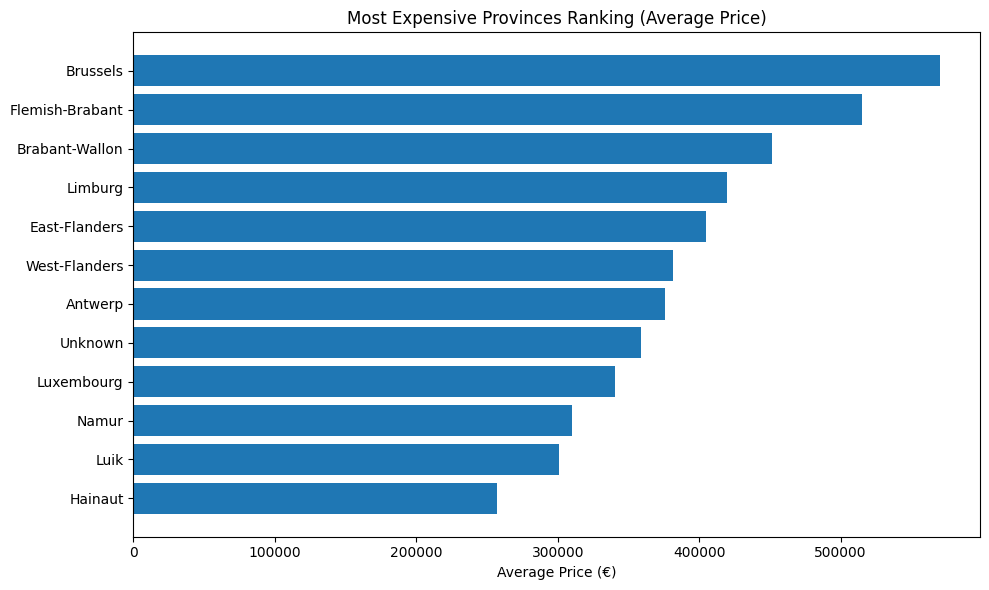

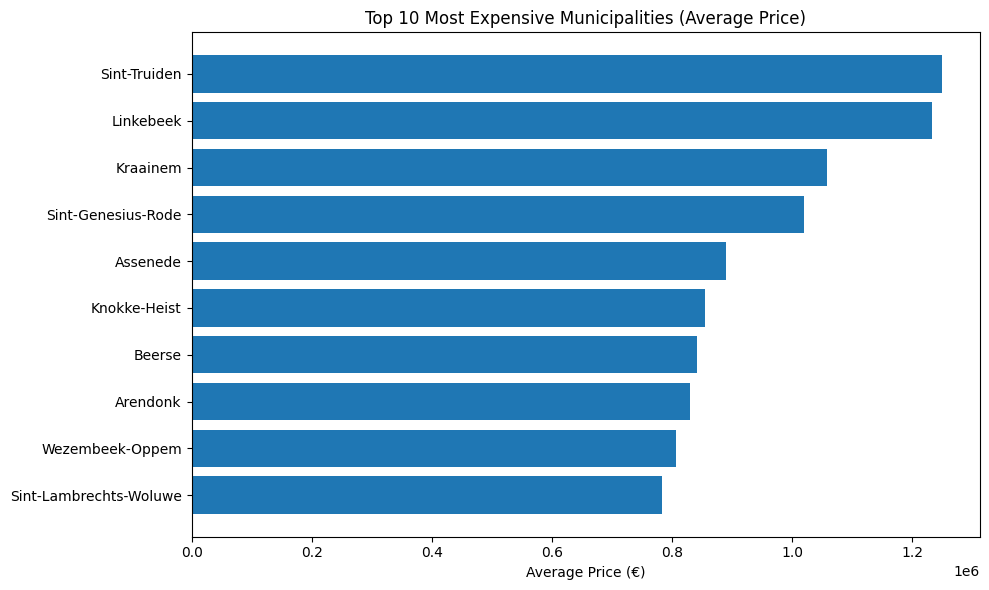

In [ ]:
# Visualisations of average prices and prices per m2 per province and per municipality

# Most Expensive Provinces Ranking (Average Price)

top10_expensive_provinces = (
    df.groupby('province')['price (€)']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
plt.barh(top10_expensive_provinces.index, top10_expensive_provinces.values)
plt.gca().invert_yaxis()
plt.title("Most Expensive Provinces Ranking (Average Price)")
plt.xlabel("Average Price (€)")
plt.tight_layout()
plt.show()

# Top Ten Most Expansive Municipalities (Average Price)

top10_expensive_municipalities = (
    df.groupby('Municipality (Level 2)')['price (€)']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top10_expensive_municipalities.index, top10_expensive_municipalities.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Most Expensive Municipalities (Average Price)")
plt.xlabel("Average Price (€)")
plt.tight_layout()
plt.show()

# Median Price per Province

median_province = (
    df.groupby('province')['price']
      .median()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
plt.barh(median_province.index, median_province.values)
plt.gca().invert_yaxis()
plt.title("Median Price per Province")
plt.xlabel("Median Price (€)")
plt.tight_layout()
plt.show()


